In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
all_data_df = pd.read_csv('./../../../Databases/clean_data.csv')
marag_df = all_data_df[all_data_df['SiteId'] == 2][['Timestamp', 'TotalEntries', 'Temperature', 'Precipitation', 'Open/Closed']]
marag_df['Timestamp'] = pd.to_datetime(marag_df['Timestamp'], dayfirst=True)
marag_df.set_index('Timestamp', inplace=True)
marag_df.sort_index(inplace=True)

In [3]:
marag_df.head()

,TotalEntries,Temperature,Precipitation,Open/Closed
Timestamp,,,,
2017-01-04 00:00:00,0,10.7,0.0,1
2017-01-04 00:30:00,0,10.8,0.0,0
2017-01-04 01:00:00,0,10.9,0.0,0
2017-01-04 01:30:00,0,11.0,0.0,0
2017-01-04 02:00:00,0,11.1,0.0,0


In [4]:
# Checking the continuity of the time series:

test_marag = marag_df.asfreq('30T')
pd.Series(test_marag[test_marag['TotalEntries'].isnull()].index).describe()

count                     192
unique                    192
top       2017-01-05 23:30:00
freq                        1
first     2017-01-05 00:00:00
last      2017-01-08 23:30:00
Name: Timestamp, dtype: object

In [5]:
marag_df.head(50).tail()

,TotalEntries,Temperature,Precipitation,Open/Closed
Timestamp,,,,
2017-01-04 22:30:00,0,9.7,0.0,1
2017-01-04 23:00:00,0,9.3,0.0,1
2017-01-04 23:30:00,0,9.3,0.0,1
2017-01-09 00:00:00,0,9.0,0.0,1
2017-01-09 00:30:00,0,9.3,0.0,0


In Maragall time series, we see that at the begining there's a gap of 4 full days (equivalent to 192 observations).

In [6]:
# Looking for null values:

marag_df.isnull().sum()

TotalEntries     0
Temperature      0
Precipitation    0
Open/Closed      0
dtype: int64

In [7]:
marag_df.describe()

,TotalEntries,Temperature,Precipitation,Open/Closed
count,37344.000000,37344.000000,37344.000000,37344.000000
mean,152.912409,17.783478,0.039567,0.833333
std,128.908313,6.231573,0.601515,0.372683
min,0.000000,1.100000,0.000000,0.000000
25%,36.000000,12.700000,0.000000,1.000000
50%,135.000000,17.200000,0.000000,1.000000
75%,241.000000,23.100000,0.000000,1.000000
max,1525.000000,35.800000,58.700000,1.000000


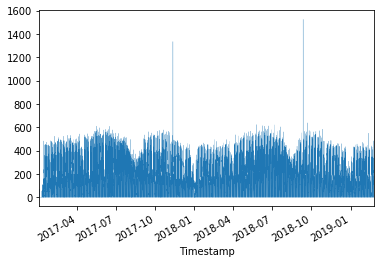

In [8]:
marag_df['TotalEntries'].plot(linewidth=0.2)
plt.show()

This time series is the largest of the 3, with more than 2 years of data.

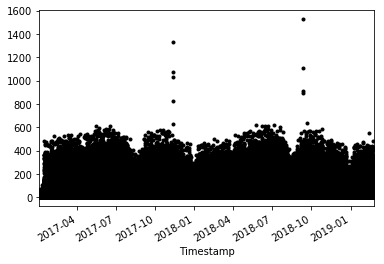

In [9]:
marag_df['TotalEntries'].plot(style='k.')
plt.show()

In [10]:
# Let's plot the TotalEntries data segregated by year:

my_groups = marag_df['TotalEntries'].groupby(pd.Grouper(freq= 'A'))
marag_years = pd.DataFrame
tempdf = pd.DataFrame
for k, p in my_groups:
    tempdf = my_groups.get_group(k) 

In [11]:
# Let's plot the TotalEntries data segregated by year:

my_groups = marag_df.drop(['Temperature', 'Precipitation', 'Open/Closed'], axis=1).groupby(pd.Grouper(freq= 'A'))
marag_years = pd.DataFrame

for k, p in my_groups:
    tempdf = my_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.year[:1][0])]    
    tempdf['time'] = tempdf.index.strftime('%m-%d-%H-%M')
    if marag_years.empty:
        marag_years = tempdf
    else:
        marag_years = marag_years.merge(tempdf, how='outer', on='time')

marag_years.sort_values('time', inplace=True)
marag_years.set_index(marag_years['time'], inplace=True)
marag_years.drop('time', axis=1, inplace=True)
marag_years.head()

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,2017,2018,2019
time,,,
01-01-00-00,NaN,15,0.0
01-01-00-30,NaN,0,0.0
01-01-01-00,NaN,0,0.0
01-01-01-30,NaN,0,0.0
01-01-02-00,NaN,0,0.0


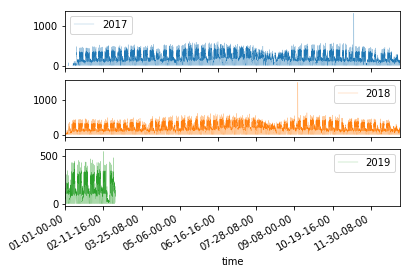

In [12]:
marag_years.plot(subplots=True, legend=True, linewidth=0.2)
plt.show()

Both on 2017 and 2018, 2 peaks can be clearly seen. Later we will analyze those outliers. On both years we can see a similar pattern is shown.

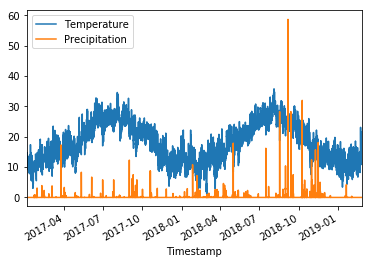

In [13]:
# Weather time series plot

marag_df[['Temperature', 'Precipitation']].plot()
plt.show()

A temperature cycle can be observed in a year basis, whereas there's a significant difference in precipitation comparing 2017 and 2018. 

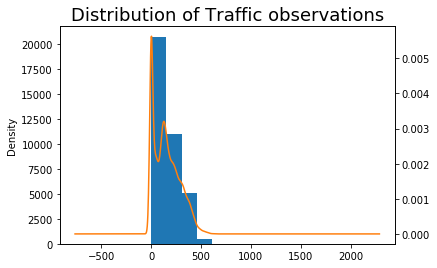

In [14]:
# Traffic observations distribution

ax = marag_df['TotalEntries'].hist()
marag_df.TotalEntries.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Distribution of Traffic observations', fontsize=18)
plt.show()

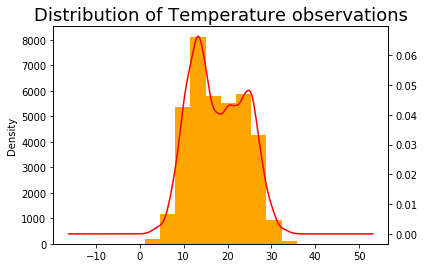

In [15]:
# Temperature observations distribution

ax = marag_df['Temperature'].hist(color='orange')
marag_df.Temperature.plot(kind='kde', color='red', ax=ax, secondary_y=True)
plt.title('Distribution of Temperature observations', fontsize=18)
plt.show()

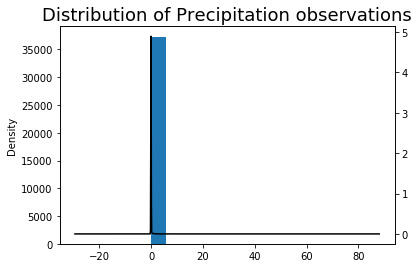

In [16]:
# Precipitation observations distribution

ax = marag_df['Precipitation'].hist()
marag_df.Precipitation.plot(kind='kde', color='black', ax=ax, secondary_y=True)
plt.title('Distribution of Precipitation observations', fontsize=18)
plt.show()

Since most precipitation observations are 0, little information can be extracted from their distribution.

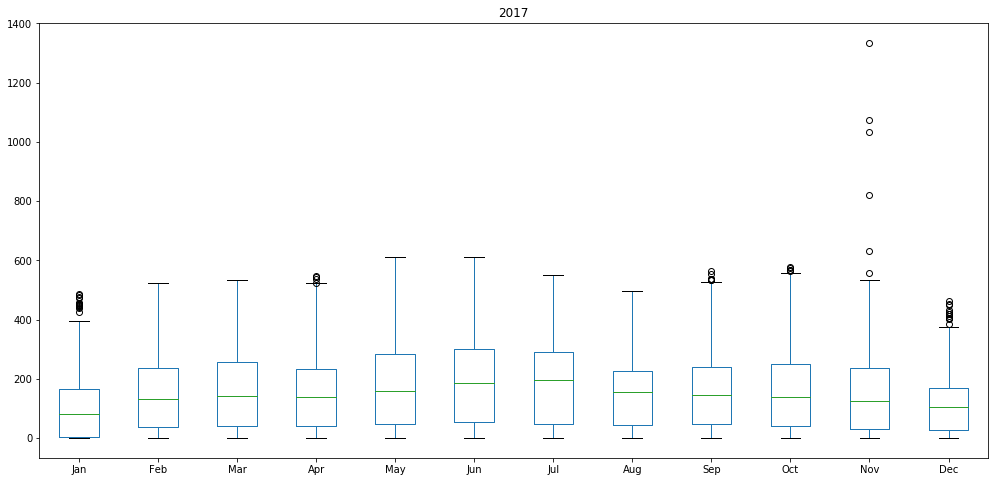

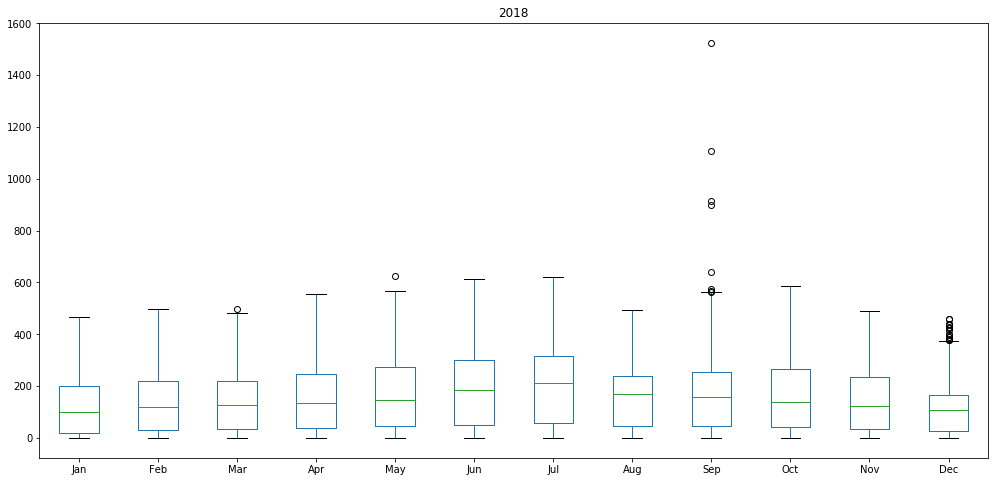

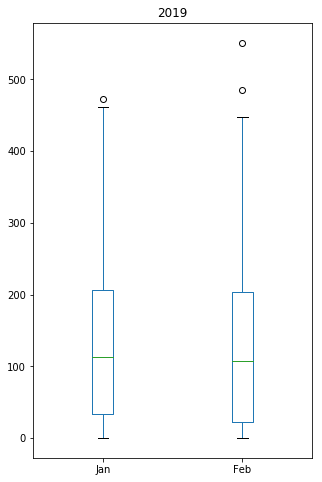

In [17]:
# Let's box plot TotalEntries segregated by year and month:

m_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ma17m_groups = marag_df['2017']['TotalEntries'].groupby(pd.Grouper(freq= 'M'))
mam_17 = pd.concat([pd.DataFrame(x[1].values) for x in ma17m_groups], axis = 1)
mam_17.columns = m_names

ma18m_groups = marag_df['2018']['TotalEntries'].groupby(pd.Grouper(freq= 'M'))
mam_18 = pd.concat([pd.DataFrame(x[1].values) for x in ma18m_groups], axis = 1)
mam_18.columns = m_names

ma19m_groups = marag_df['2019']['TotalEntries'].groupby(pd.Grouper(freq= 'M'))
mam_19 = pd.concat([pd.DataFrame(x[1].values) for x in ma19m_groups], axis = 1)
mam_19.columns = ['Jan', 'Feb']

mam_17.plot(kind='box', figsize=(17,8), title='2017')
mam_18.plot(kind='box', figsize=(17,8), title='2018')
mam_19.plot(kind='box', figsize=(5,8), title='2019')
plt.show()

November of 2017 and September of 2018 show some very strong outliers that we'll be checked later.

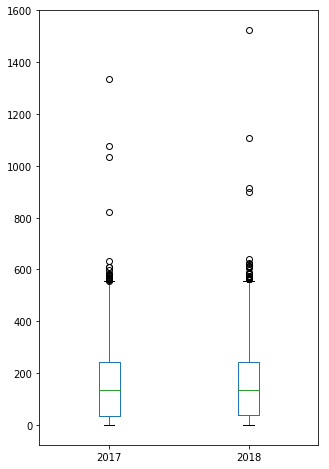

In [18]:
#Since the maragall data contains 2018 and almost all 2017, let's compare the distribution of each using boxplots:

marag_years[['2017', '2018']].plot(kind='box', figsize=(5,8))
plt.show()

In [19]:
marag_years.describe()

,2017,2018,2019
count,17184.000000,17520.000000,2640.000000
mean,154.782356,155.158904,125.832197
std,130.328674,129.631540,110.459443
min,0.000000,0.000000,0.000000
25%,36.000000,38.000000,26.000000
50%,137.000000,137.000000,111.000000
75%,244.000000,245.000000,205.000000
max,1335.000000,1525.000000,551.000000


As we see both in the boxplot and the descriptive data frame, the traffic data is distributed very similarly each complete year.

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



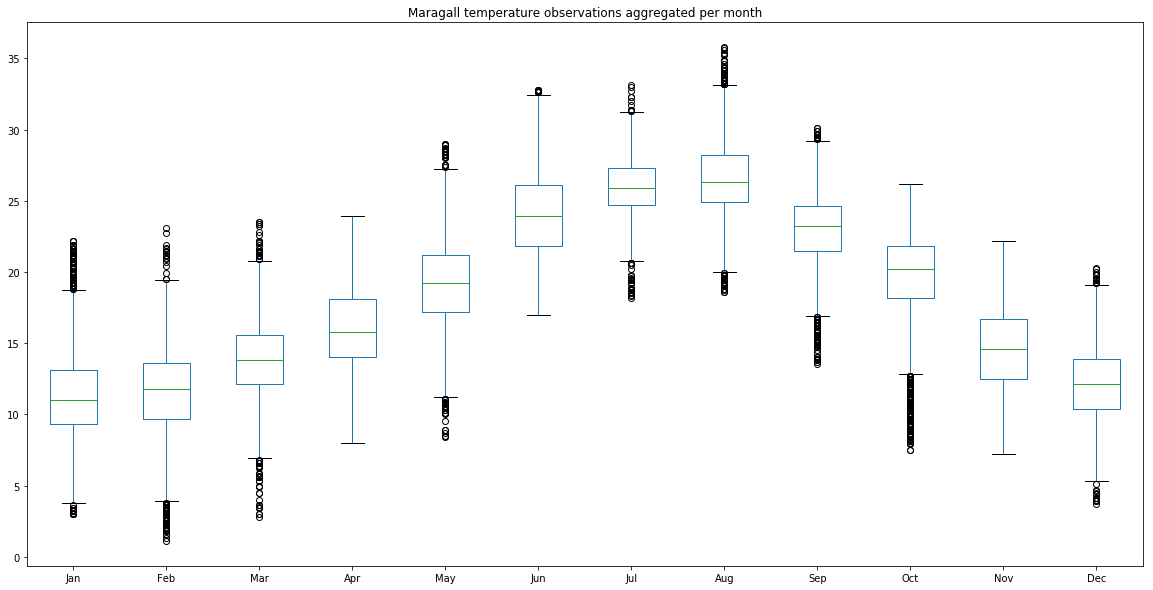

In [22]:
# Let's plot the Temperature data segregated by months to get an idea of its distribution:

def marag_monthly_grouper(x):
    '''Function to aggregate feature by month
    
    Parameters: feature series
    
    Returns: dataframe of dimensions (nrows x 12 columns)
    '''
      
    marag_m_groups = x.groupby(pd.Grouper(freq= 'M'))
    marag_m_df = pd.DataFrame
    for k, p in marag_m_groups:
        tempdf = pd.DataFrame(marag_m_groups.get_group(k)) 
        tempdf.columns = [str(tempdf.index.month[:1][0])]    

        if marag_m_df.empty:
            marag_m_df = tempdf

        elif tempdf.columns[0] in marag_m_df.columns:
            marag_m_df = pd.concat([marag_m_df, tempdf], axis=0)

        else:
            marag_m_df = pd.concat([marag_m_df, tempdf], axis = 1)

    temp_cols = [int(x) for x in marag_m_df.columns.tolist()]
    temp_cols.sort()
    temp_cols = [str(x) for x in temp_cols]
    marag_m_df = marag_m_df[temp_cols]
    marag_m_df.columns = m_names
    
    return marag_m_df


marag_mtemp_df = marag_monthly_grouper(marag_df['Temperature'])    
marag_mtemp_df.plot(kind='box', title='Maragall temperature observations aggregated per month', figsize=(20, 10))
plt.show()

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



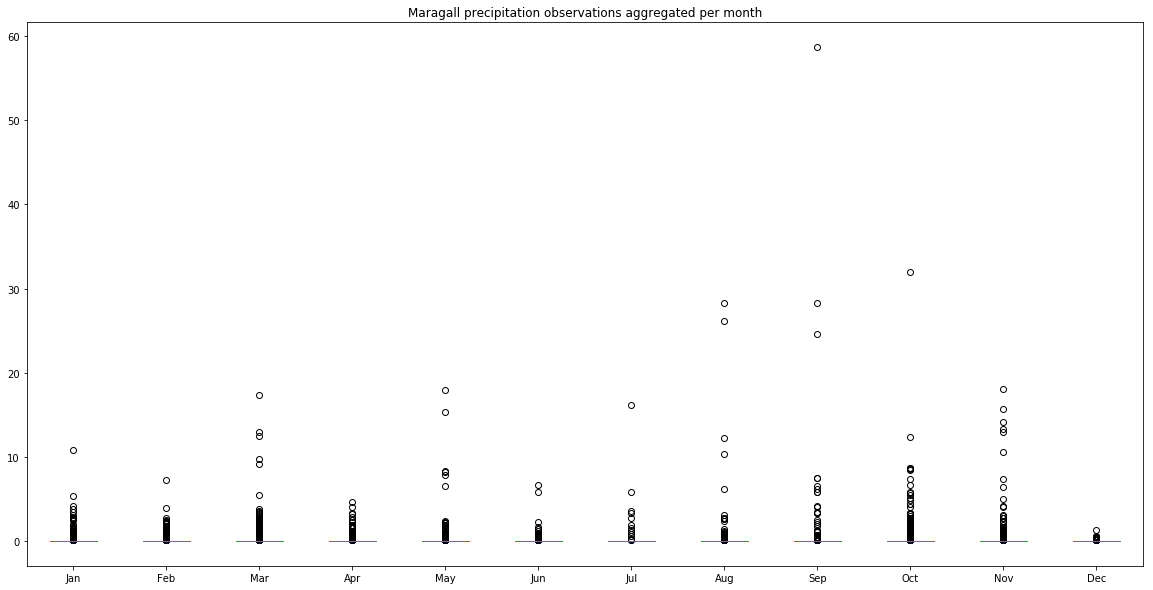

In [23]:
# Now let's plot the Precipitation data segregated by months:

marag_mprec_df = marag_monthly_grouper(marag_df['Precipitation'])
marag_mprec_df.plot(kind='box', title='Maragall precipitation observations aggregated per month', figsize=(20, 10))
plt.show()

In [130]:
# Let's create a heatmap using data of 2017 and 2018

maraghm_groups = (pd.DataFrame(marag_df['TotalEntries']).groupby(pd.Grouper(freq= 'D')).sum()).groupby(pd.Grouper(freq= 'A'))

marag_hm_df = pd.DataFrame
for k, p in maraghm_groups:
    tempdf = maraghm_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.year[:1][0])]    
    tempdf['key'] = tempdf.index.strftime('%U').astype(str) + '-' + tempdf.index.strftime('%w').astype(str)
    
    if marag_hm_df.empty:
        marag_hm_df = tempdf
    else:
        marag_hm_df = pd.merge(marag_hm_df, tempdf, how='outer', on='key')

marag_hm_df.sort_values('key', inplace=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Maragall traffic data along 2017 and 2018


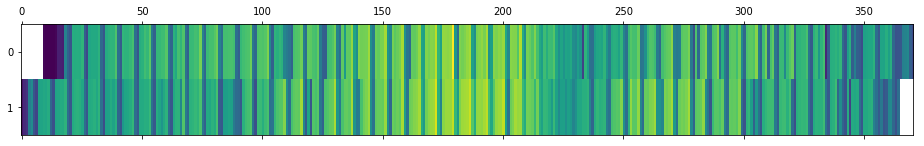

In [109]:
print('Maragall traffic data along 2017 and 2018')
plt.matshow(marag_hm_df[['2017', '2018']].T, interpolation=None, aspect='auto')
plt.show()

The maragall heatmap shows a bigger picture than the RavalNord one: not only confirms the weekdays-weekend cycle, but shows a decrease of traffic between days 200 - 250. Those correspond to the period between late july and early september, so apparently the data tells the tale that could be expected.

## Exploring correlations between variables

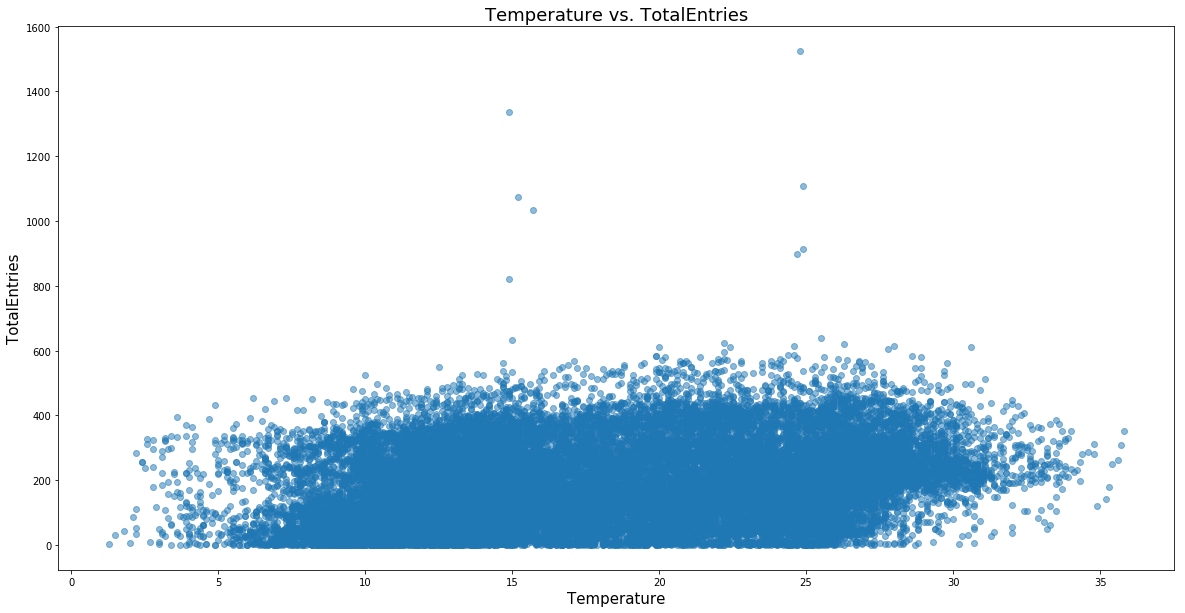

In [110]:
plt.scatter(marag_df['Temperature'][marag_df['Open/Closed'] == 1], marag_df['TotalEntries'][marag_df['Open/Closed'] == 1], alpha=0.5)
plt.title('Temperature vs. TotalEntries', fontsize=18)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('TotalEntries', fontsize=15)
plt.show()

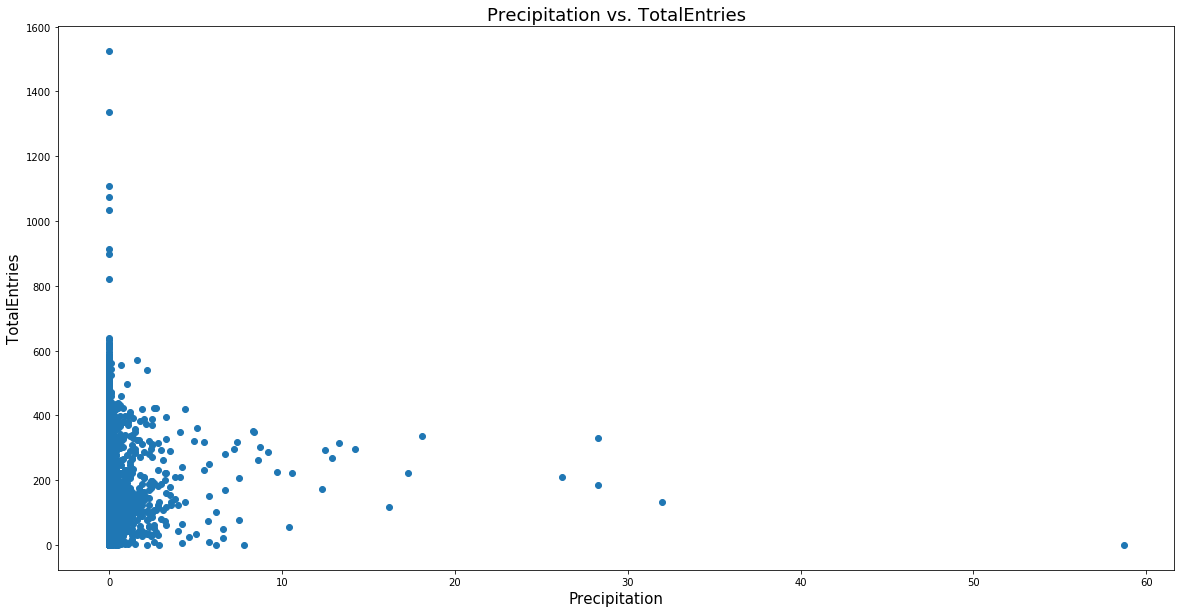

In [112]:
plt.scatter(marag_df['Precipitation'][marag_df['Open/Closed'] == 1], marag_df['TotalEntries'][marag_df['Open/Closed'] == 1])
plt.title('Precipitation vs. TotalEntries', fontsize=18)
plt.xlabel('Precipitation', fontsize=15)
plt.ylabel('TotalEntries', fontsize=15)
plt.show()

In [113]:
marag_df.corr()

,TotalEntries,Temperature,Precipitation,Open/Closed
TotalEntries,1.000000,0.272594,-0.006962,0.530164
Temperature,0.272594,1.000000,-0.035049,0.131505
Precipitation,-0.006962,-0.035049,1.000000,-0.006371
Open/Closed,0.530164,0.131505,-0.006371,1.000000


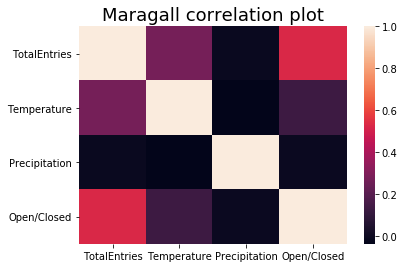

In [24]:
sns.heatmap(marag_df.corr())
plt.title('Maragall correlation plot', fontsize=18)
plt.show()

## Autocorrelation and decomposition of the time series

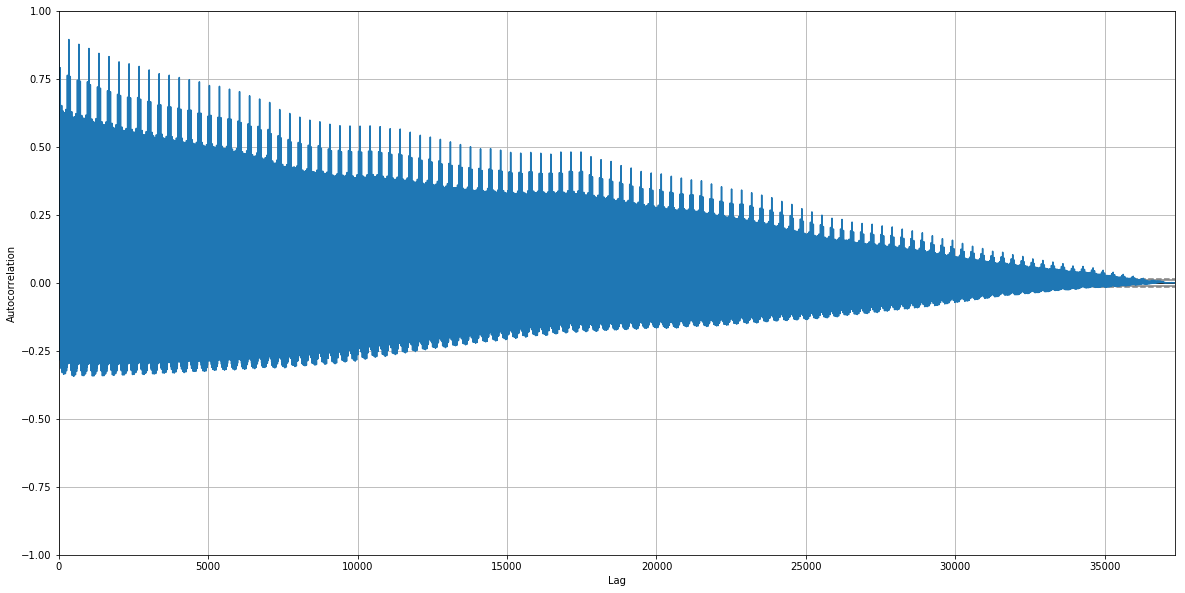

In [115]:
# People traffic autocorrelation plot

from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20, 10))
autocorrelation_plot(marag_df['TotalEntries'])
plt.show()

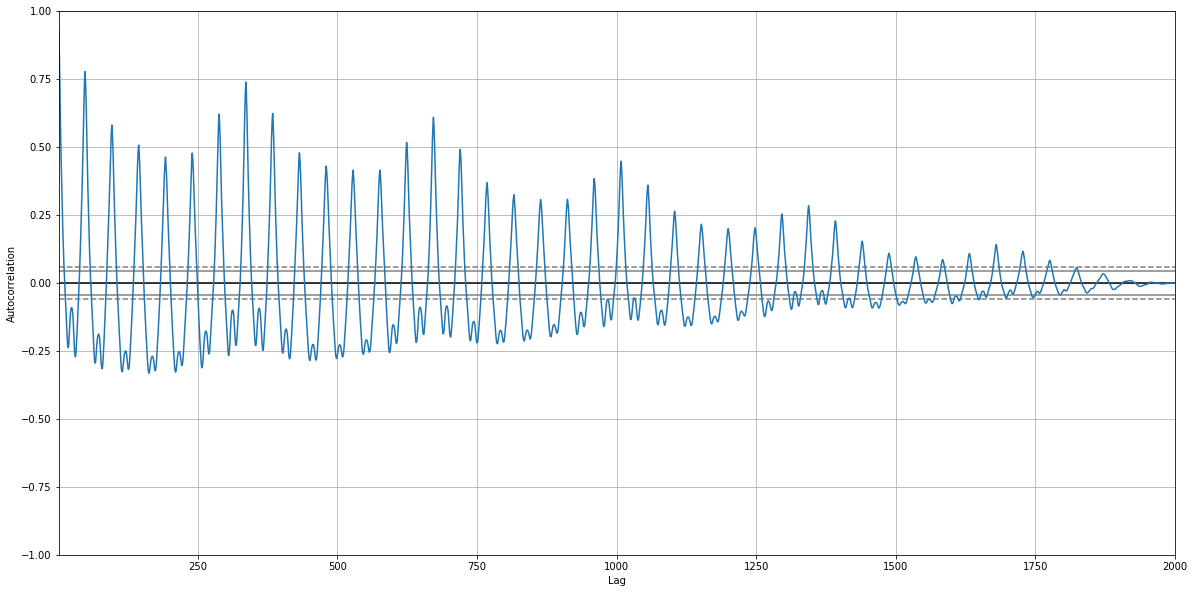

In [116]:
# There are too many observations. Let's take just a few from the end:

plt.figure(figsize=(20, 10))
autocorrelation_plot(marag_df['TotalEntries'][-2000:])
plt.show()

The weekly cycle behaviour discovered on the RavalNord time series can be seen again in Maragall.

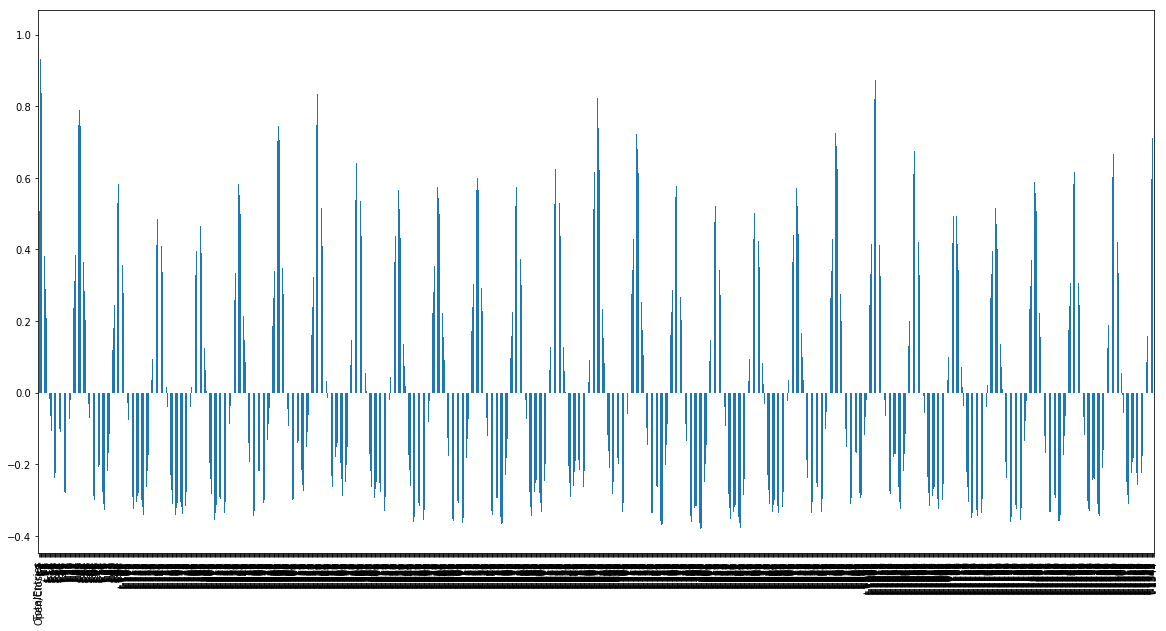

In [118]:
def append_lags(x, N):
    temp_df = x.copy()
    for i in range (1, N+1):
        temp_df['t-' + str(i)] = x['TotalEntries'].shift(i)
    return temp_df.iloc[N:]

# Plotting correlations creating a month of lags:

marag_lags = append_lags(marag_df[-4000:], (48*7*4))
plt.figure(figsize=(20, 10))
marag_lags.drop(['Temperature', 'Precipitation', 'Open/Closed'], axis=1).corr()['TotalEntries'].plot(kind='bar')
plt.show()

Maragall 2017 decomposition


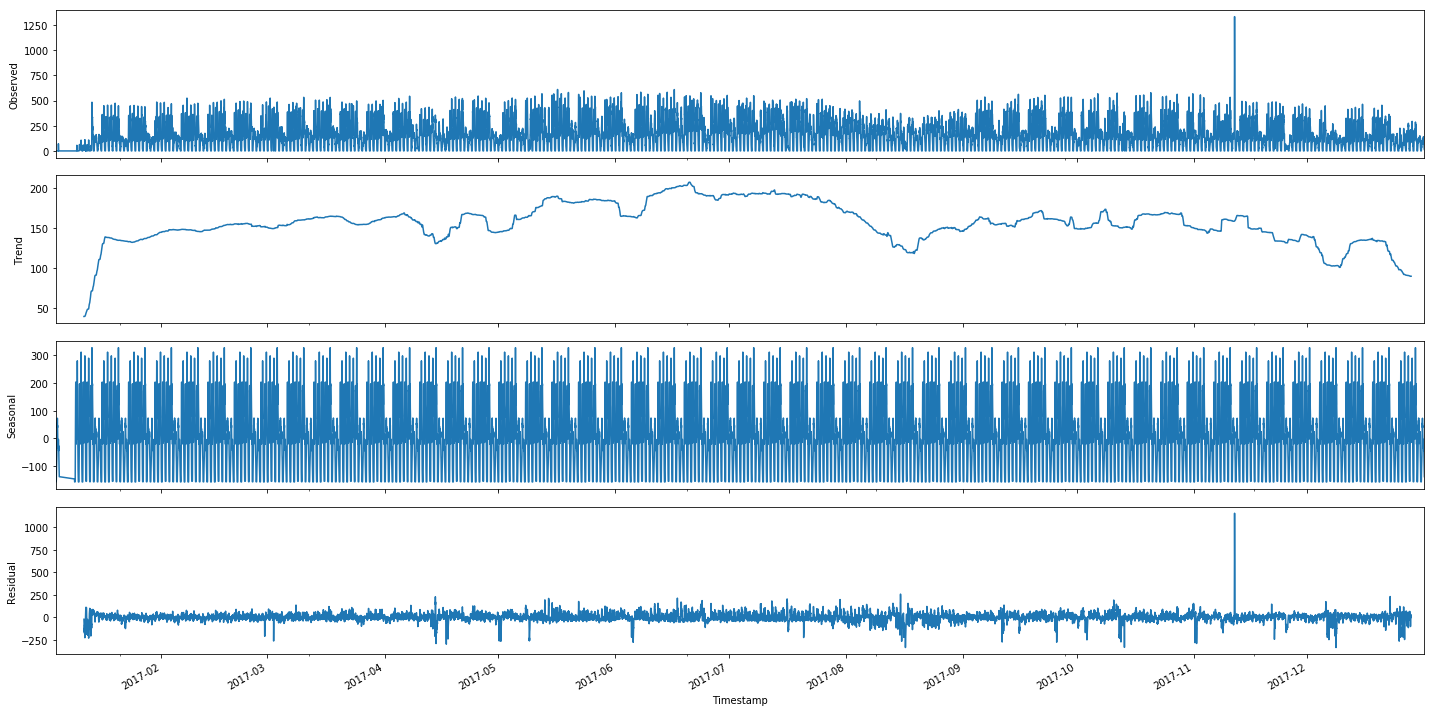

In [125]:
# Finally, let's decompose the time series assuming the seasonal component is additive and a frequency on 1 week.

marag_wdec_17 = seasonal_decompose(marag_df[marag_df.index.year == 2017]['TotalEntries'].astype(np.float64)
                                , freq=(48*7))
marag_wdec_18 = seasonal_decompose(marag_df[marag_df.index.year == 2018]['TotalEntries'].astype(np.float64)
                                , freq=(48*7))

print('Maragall 2017 decomposition')
marag_wdec_17.plot()
plt.show()

Maragall 2018 decomposition


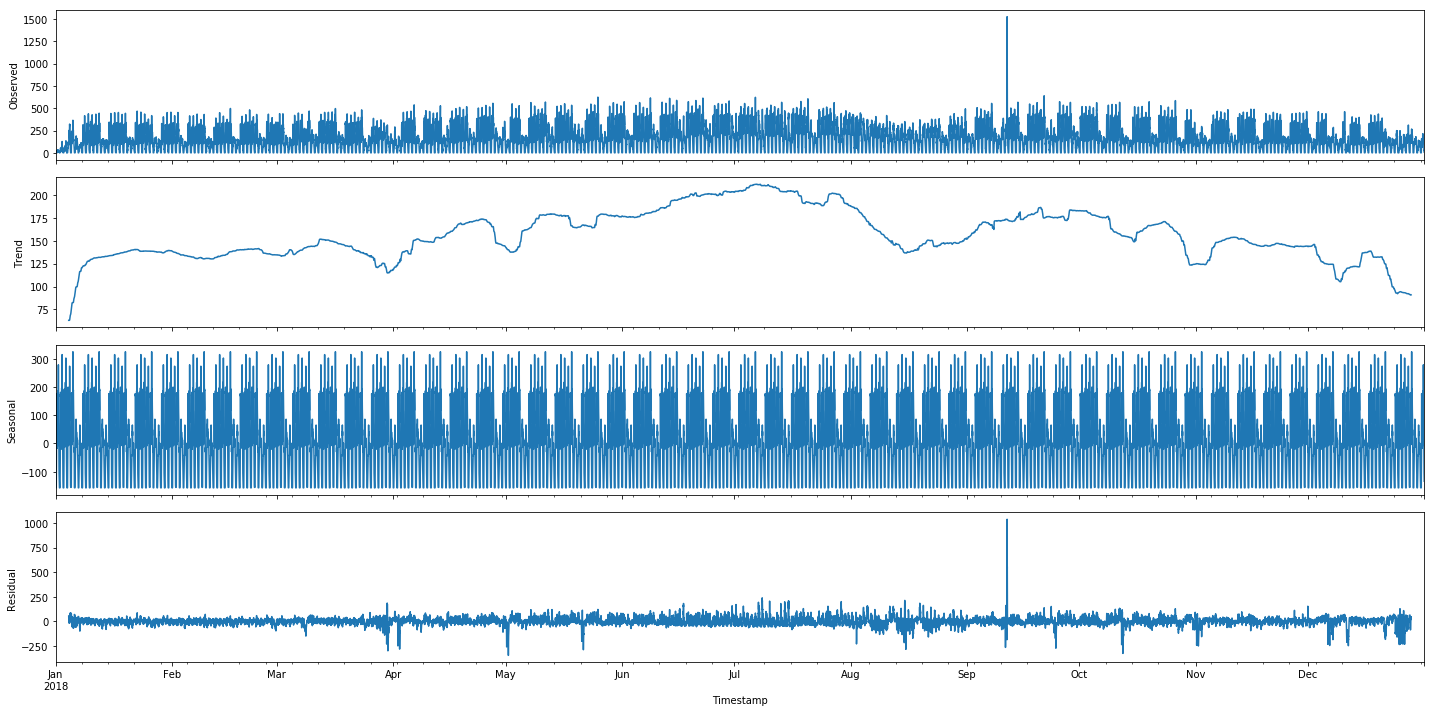

In [126]:
print('Maragall 2018 decomposition')
marag_wdec_18.plot()
plt.show()

The decomposition of both year show a very similar pattern, specially on the seasonal component.

### Outliers

In [128]:
marag_df['TotalEntries'].sort_values(ascending=False).head(20)

Timestamp
2018-09-11 18:00:00    1525
2017-11-11 19:00:00    1335
2018-09-11 17:30:00    1108
2017-11-11 18:30:00    1075
2017-11-11 19:30:00    1033
2018-09-11 19:00:00     914
2018-09-11 18:30:00     898
2017-11-11 20:00:00     822
2018-09-21 15:00:00     639
2017-11-11 18:00:00     632
2018-05-25 15:00:00     624
2018-07-06 15:00:00     622
2018-06-08 15:00:00     615
2018-06-22 15:00:00     613
2017-05-16 18:00:00     611
2018-06-13 18:00:00     611
2017-06-16 15:00:00     610
2018-07-20 15:00:00     605
2017-05-23 18:00:00     597
2018-06-15 15:00:00     588
Name: TotalEntries, dtype: int64

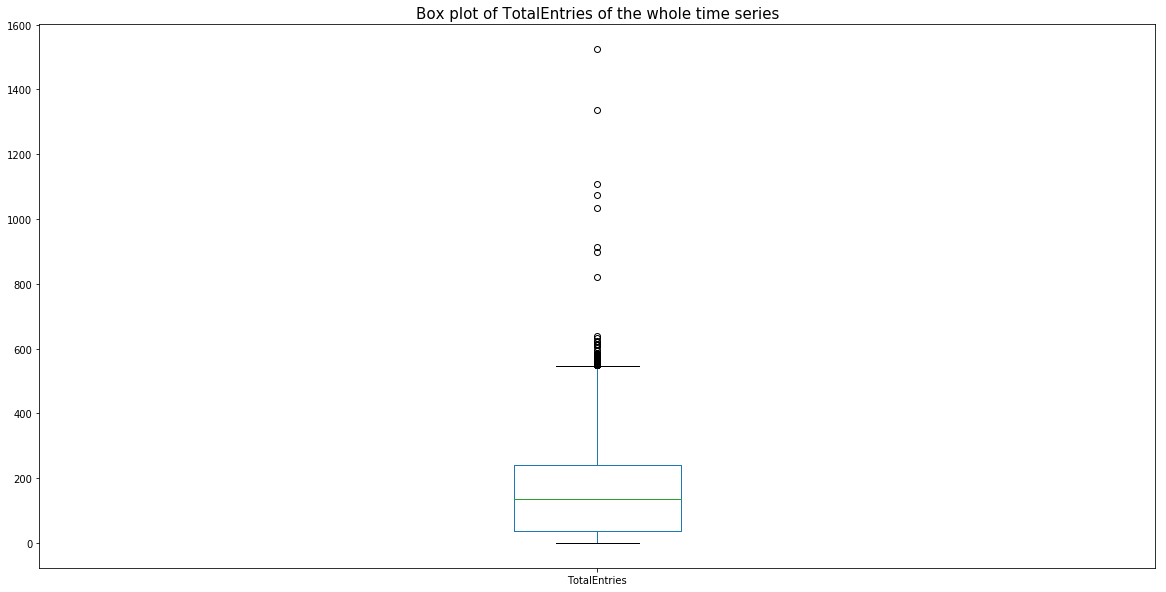

In [129]:
marag_df['TotalEntries'].plot(kind='box')
plt.title('Box plot of TotalEntries of the whole time series', fontsize=15)
plt.show()

In the boxplot we have 8 extreme outliers. When consulted with the domain experts, the possibility of a system malfunction was discarded. After further anaylisis, the explanation was discovered on the dates:

https://www.theguardian.com/world/2017/nov/11/barcelona-protest-calls-for-release-of-jailed-catalan-independence-leaders
https://www.theguardian.com/world/2018/sep/11/catalans-renew-calls-independence-rally-barcelona

Both 11.11.2017 and 11.09.2018 were dates on which there were demonstrations related with the political clima in Catalonia. The demonstrations ended up in riots and that's the reason behind the high amount of traffic.

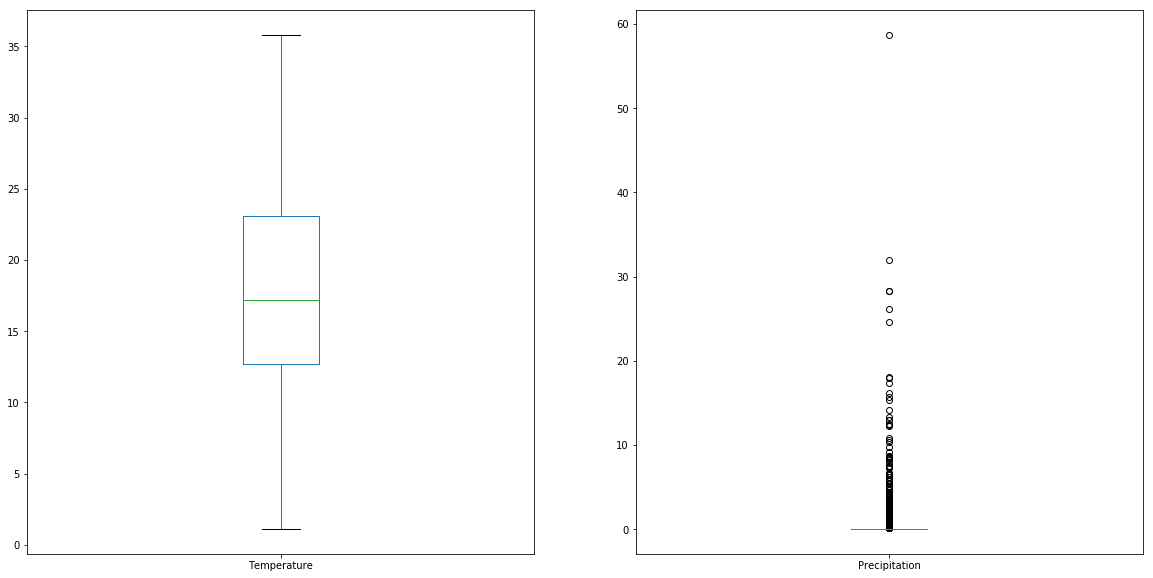

In [130]:
# Weather outliers

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
marag_df['Temperature'].plot(kind='box', ax=ax1)
marag_df['Precipitation'].plot(kind='box', ax=ax2)
plt.show()

In [131]:
marag_df['Precipitation'].sort_values(ascending=False).head(20)

Timestamp
2018-09-06 00:00:00    58.7
2018-10-09 06:00:00    32.0
2018-08-17 11:30:00    28.3
2018-09-12 16:00:00    28.3
2018-08-17 11:00:00    26.2
2018-09-06 00:30:00    24.6
2018-11-15 15:00:00    18.1
2018-05-01 03:30:00    17.9
2017-03-24 20:00:00    17.3
2018-07-16 06:00:00    16.2
2018-11-09 02:30:00    15.7
2018-05-01 04:00:00    15.3
2018-11-15 14:30:00    14.2
2018-11-15 14:00:00    13.3
2018-11-15 02:30:00    13.0
2017-03-24 19:00:00    12.9
2017-03-24 18:30:00    12.5
2018-10-31 01:00:00    12.4
2017-08-31 09:00:00    12.3
2018-01-26 04:00:00    10.8
Name: Precipitation, dtype: float64

In [133]:
marag_df.to_csv('./../../../Databases/marag_data.csv', index=True)